In [2]:
# Download from the internet if not already installed
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install PyWavelets
!{sys.executable} -m pip install scikit-image

# Import into Jupyter
import matplotlib.pyplot as plt
import numpy as np
import pywt

from skimage.restoration import denoise_wavelet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homeb

In [3]:
#importing data

time = []
ch1 = []
ch2 = []
ch3 = []
ch4 = []
ch5 = []
ch6 = []
ch7 = []
ch8 = []

with open("/Users/chrissamra/EMG-Research/EMG-Recorder/Recordings/132_2022_870402.csv", "r") as data:
    for line in data:
        # Format the line
        line = line.split(",") # covert row to list
        
        if line[0] != "Time": #if we passed the headers
            time.append(float(line[0])) 
            ch1.append(float(line[1]))
            ch2.append(float(line[2]))
            ch3.append(float(line[3]))
            ch4.append(float(line[4]))
            ch5.append(float(line[5]))
            ch6.append(float(line[6]))
            ch7.append(float(line[7]))
            ch8.append(float(line[8]))
        

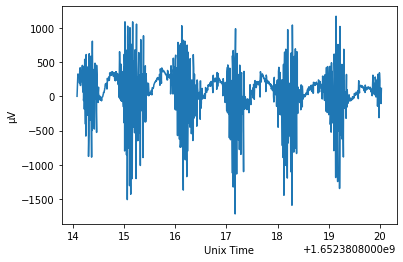

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot Ch1 against time 
plt.plot(time, ch1)
plt.xlabel("Unix Time")
plt.ylabel("μV")
plt.show()
plt.clf()

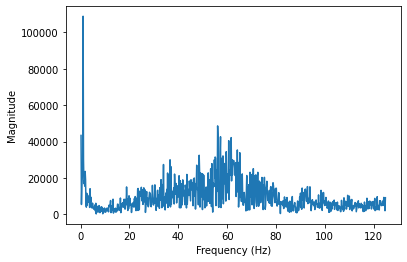

<Figure size 432x288 with 0 Axes>

In [6]:
# FFt of Ch1
fftData = np.fft.fft(ch1)
freq = np.fft.fftfreq(len(ch1))*250 #250h

# Remove unnecessary negative reflection
fftData = fftData[1:int(len(fftData)/2)]
freq = freq[1:int(len(freq)/2)]

# Recall FFT is a complex function
fftData = np.sqrt(fftData.real**2 + fftData.imag**2)

# Plot for sanity check
plt.plot(freq, fftData)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.clf()

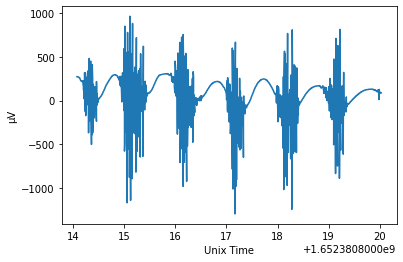

<Figure size 432x288 with 0 Axes>

In [12]:
# We want time information as well as frequency information so FFT's wont help us here
# We also need to filter the EMG signal 


# let x be our optimal signal, then let y = x + sigma*E be our real signal where E is the noise and sigma 
# is the noise amplitude that scales the noise

# using the scikit image library we can use a discrete wavelet transformation to denoise the signal (1d image) by
# decomposing the signal into its coefficients and then applying a threshold to those coeficients before the 
# IWT is applied to reconstruct it

ch1 = np.array(ch1)


# soft universal thresholding method applied
# wavelet decomposes signal by 6 levels (6 detail and 6 approximate coefficients)
# once threshold is applied, signal gets reconstructed, this all happens in one function call
ch1_filtered_db = denoise_wavelet(ch1, method='VisuShrink', mode='soft',wavelet_levels=6,wavelet='db7',rescale_sigma=True)


# Plot filtered Ch1 against time 
plt.plot(time, ch1_filtered_db)
plt.xlabel("Unix Time")
plt.ylabel("μV")
plt.show()
plt.clf()


In [ ]:
# older code using pywt library


# cApprox, cDetail = pywt.dwt(ch1, 'db7') # DWT to filter signal
# ch1_filtered_db = pywt.idwt(cApprox, cDetail, 'db7') #inverse DWT to reconstruct signal 

# #print(len(cDetail))

# cApprox, cDetail = pywt.dwt(ch1, 'sym6') # DWT to filter signal
# ch1_filtered_sym = pywt.idwt(cApprox, cDetail, 'sym6') #inverse DWT to reconstruct signal 


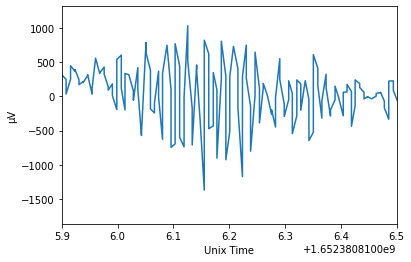

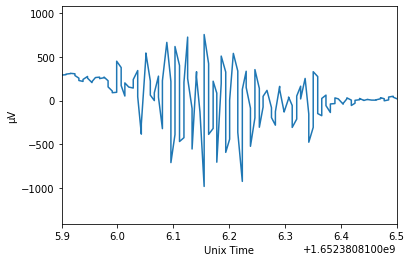

<Figure size 432x288 with 0 Axes>

In [10]:
# lets examine a smaller section of the plot:

# Plot Ch1 against time 
plt.plot(time, ch1)
plt.xlabel("Unix Time")
plt.ylabel("μV")
plt.xlim([1652380815.9, 1652380816.5])
plt.show()
plt.clf()

# Plot filtered Ch1 against time (DB)
plt.plot(time, ch1_filtered_db)
plt.xlabel("Unix Time")
plt.ylabel("μV")
plt.xlim([1652380815.9, 1652380816.5])
plt.show()
plt.clf()

In [ ]:
# indeed, our EMG signal has been sucessfuly filtered 

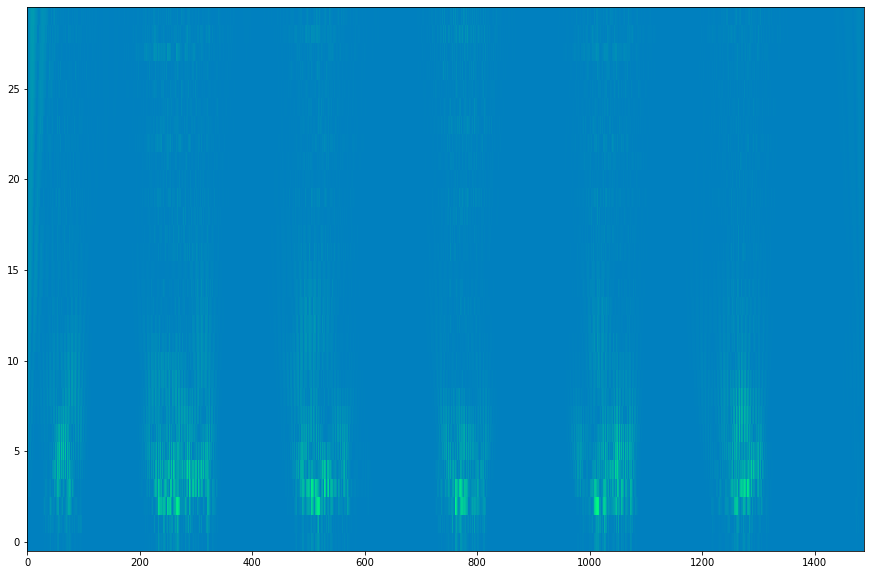

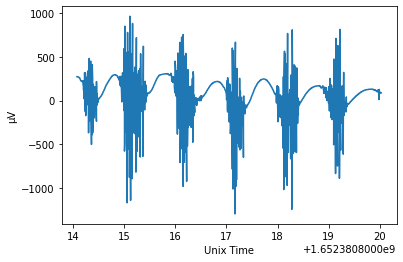

<Figure size 432x288 with 0 Axes>

In [20]:
#applying CWT to our filtered signal using the morlet wavelet
signal = ch1_filtered_db
scales = np.arange(1, 31) #std scale for the cwt fcn in the library
coef, frqs = pywt.cwt(signal, scales,'morl')


#creating magnitude spectogram plot
plt.figure(figsize=(15,10))
plt.imshow(abs(coef), interpolation='none', cmap='winter', 
           aspect='auto',vmax=abs(coef).max(), vmin= -abs(coef).max())

plt.gca().invert_yaxis()
plt.show()
plt.clf()

# Plot filtered Ch1 against time 
plt.plot(time, ch1_filtered_db)
plt.xlabel("Unix Time")
plt.ylabel("μV")
plt.show()
plt.clf()



In [ ]:
#more work needs to be done on the spectrogram plot but it works